<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
df = pd.DataFrame(x_test,columns=data.feature_names)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.937232,0.478903,-0.859777,-0.851125,1.894423,0.300315,0.171468,0.168013,0.270915,0.837988,-0.678288,0.389379,-0.571178,-0.633374,0.329575,-0.432035,-0.186821,-0.219709,-0.854108,-0.282673,-0.734355,1.595099,-0.619732,-0.675642,2.649026,0.088399,0.616138,0.400447,0.081804,0.659066
1,-0.675140,0.523115,-0.656488,-0.674257,-2.216988,0.015058,-0.032376,-0.662817,-1.720839,0.468740,-0.599965,0.618698,-0.497087,-0.543549,-0.058890,1.986710,1.199144,0.618091,0.370387,1.974655,-0.744583,0.413818,-0.728872,-0.687612,-1.712501,0.530197,0.232757,-0.420383,-1.005693,0.849642
2,0.549852,-0.749730,0.558713,0.361102,0.157412,0.707825,-0.292972,0.099178,0.617465,0.411492,-0.929001,-1.319596,-0.834674,-0.689961,-0.811421,-0.405028,-0.406232,0.038450,-0.145449,-0.031049,0.110477,-1.077632,0.141607,-0.063968,-0.402639,-0.004877,-0.293022,0.141789,0.393696,0.303249
3,-0.244969,2.659260,-0.264341,-0.310647,-0.304096,-0.580278,-0.762682,-0.440621,-1.625994,-0.384252,-0.257607,1.292096,-0.312138,-0.304840,-0.384109,-0.723477,-0.800557,-0.421365,-0.599875,-0.303770,-0.282278,2.629545,-0.341143,-0.338385,-0.687884,-0.716417,-0.966295,-0.567953,-1.185567,-0.404528
4,1.133861,-0.098182,1.070029,1.053762,0.060023,0.113230,0.276883,0.745266,-0.050101,-0.888032,-0.002049,-1.208030,-0.167299,0.243725,-0.711576,-0.491111,-0.250532,-0.047603,-0.954819,-0.508598,1.106682,-0.110829,0.959427,1.033526,0.498372,0.129364,0.535176,0.926735,-0.169030,-0.116460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.002879,0.565000,0.036263,-0.090506,0.115985,0.078036,0.508551,0.150045,0.234436,-0.228252,-0.478848,-0.354999,-0.106021,-0.415267,-0.372231,0.260562,0.569532,-0.018377,-0.030000,0.093996,-0.110448,0.773482,0.232803,-0.172925,0.552704,1.058968,1.170016,0.434835,1.116493,0.953193
110,-1.721797,-0.570554,-1.692315,-1.342522,-0.772870,-0.854977,-0.913573,-1.116901,-0.188721,0.312739,-1.002479,-0.468384,-0.976728,-0.874144,0.619800,-0.498425,-0.529906,-0.942717,0.640586,-0.458350,-1.527228,-0.612378,-1.501095,-1.154068,-0.121922,-0.756753,-0.972153,-1.345274,0.314485,-0.551040
111,0.296307,0.725560,0.254397,0.134862,-0.440731,-0.007170,-0.449379,-0.440874,-0.341933,0.046537,-0.804250,-1.307584,-0.837459,-0.563053,-1.203096,-0.639645,-0.466536,-0.927780,-1.081321,-0.461035,0.280261,0.389071,0.162199,0.132472,-0.103812,0.467173,0.428972,0.104410,0.430001,0.750498
112,0.068402,0.504499,0.061829,-0.046362,-0.159466,-0.113308,0.367589,-0.016982,0.927537,-0.928106,0.063758,1.830814,0.252735,-0.031793,0.748539,0.253811,0.758960,0.955809,0.448990,-0.202506,-0.044989,0.590350,0.003342,-0.156555,-0.081173,-0.366634,0.295146,0.102915,0.174216,-0.861140


In [ ]:
N,D = x_train.shape

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 15ms/step - loss: 0.9714 - accuracy: 0.4374 - val_loss: 1.0313 - val_accuracy: 0.4825
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8700 - accuracy: 0.5033 - val_loss: 0.9424 - val_accuracy: 0.5439
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7841 - accuracy: 0.5846 - val_loss: 0.8610 - val_accuracy: 0.5877
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.7107 - accuracy: 0.6440 - val_loss: 0.7898 - val_accuracy: 0.6579
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6477 - accuracy: 0.6813 - val_loss: 0.7292 - val_accuracy: 0.6754
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5953 - accuracy: 0.7187 - val_loss: 0.6753 - val_accuracy: 0.7105
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5496 - accuracy: 0.7516 - val_loss: 0.6269 - val_accuracy: 0.7456
Epoch 8/100


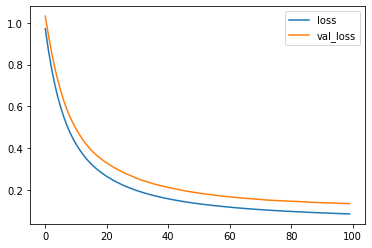

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

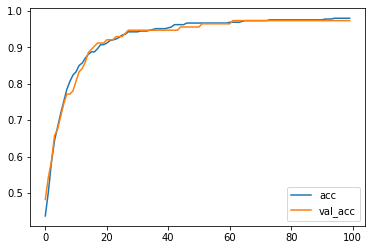

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
df = pd.DataFrame(r.history)

In [ ]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.971448,0.437363,1.031311,0.482456
1,0.870045,0.503297,0.942440,0.543860
2,0.784149,0.584615,0.860984,0.587719
3,0.710676,0.643956,0.789780,0.657895
4,0.647696,0.681319,0.729246,0.675439
...,...,...,...,...
95,0.085959,0.980220,0.135224,0.973684
96,0.085418,0.980220,0.134722,0.973684
97,0.084908,0.980220,0.134093,0.973684
98,0.084380,0.980220,0.133638,0.973684


In [ ]:
p = model.predict(x_test)

In [ ]:
import numpy as np
p = np.round(p).flatten()

In [ ]:
p

array([[3.0943465e-01],
       [9.9191886e-01],
       [8.8586360e-01],
       [7.5084341e-01],
       [2.0105422e-02],
       [9.3734533e-01],
       [9.9807107e-01],
       [5.7180017e-01],
       [9.9899131e-01],
       [2.2432208e-04],
       [9.9729353e-01],
       [9.9962103e-01],
       [9.9434006e-01],
       [1.1556134e-04],
       [9.8445678e-01],
       [9.9768466e-01],
       [3.1507015e-04],
       [8.0314279e-04],
       [6.6611171e-03],
       [2.3318201e-02],
       [7.3454303e-01],
       [9.9803007e-01],
       [4.0139916e-05],
       [8.8354570e-01],
       [9.6344960e-01],
       [9.9774373e-01],
       [1.8799871e-02],
       [2.0117104e-02],
       [9.3545491e-01],
       [9.9932122e-01],
       [9.9273545e-01],
       [9.3505275e-01],
       [9.6450204e-01],
       [6.6796255e-01],
       [9.9170721e-01],
       [1.8367916e-02],
       [9.9119627e-01],
       [2.7588308e-02],
       [7.7976370e-01],
       [9.7130644e-01],
       [8.3584976e-01],
       [8.493477

In [ ]:
p

array([1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.], dtype=float32)

In [ ]:
print('accuracy ',np.mean(p == y_test))

accuracy  0.9824561403508771


In [ ]:
print("Evaluate output:", model.evaluate(x_test, y_test))

4/4 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9825
Evaluate output: [0.08818798512220383, 0.9824561476707458]
